In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import sys
import cv2
import math
from PIL import Image
import numpy as np
from skimage import io, color
import zipfile
import imghdr
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.image as mpimg
%pylab inline
import csv
import cv2
from google.colab.patches import cv2_imshow
from termcolor import colored
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
# with open('/content/drive/MyDrive/Minor II/PCA/output_pca.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["FileName", "Original size (in bytes)", "Compressed size (in bytes)", "Compression Ratio (CR)", "PSNR"])

In [5]:
try:
    image_path = '/content/drive/MyDrive/Major/images/Lenna.png'
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Please specify an image')

In [6]:
file_name = os.path.basename(image_path)

out_name=os.path.splitext(file_name)[0]
out_name = out_name + "_pca_compressed.png"

In [7]:
rgba_image = Image.open(image_path)
rgb_image = rgba_image.convert('RGB')
image=np.asarray(rgb_image)/255
w,h,d=image.shape
print(w," ",h," ",d)

512   512   3


In [8]:
or_im=image.reshape(w*h*d)/255
or_im.shape

(786432,)

In [9]:
ori_img = rgb_image
X = np.array(ori_img.getdata())
ori_pixels = X.reshape(*ori_img.size, -1)
ori_pixels.shape

(512, 512, 3)

In [10]:
# fig, axes = plt.subplots(1, 4, figsize=(15,5))
# cmap_list = ["Reds", "Greens", "Blues"]

# axes[0].imshow(ori_pixels)
# axes[0].axis("off")
# axes[0].set_title("Combined", size = 20)

# for idx, ax, px in zip(range(3), axes[1:], ori_pixels.T):
#     ax.imshow(px.T, cmap = cmap_list[idx])
#     ax.axis("off")
#     ax.set_title(cmap_list[idx][:-1], size = 20)
    
# plt.tight_layout()
# fig.suptitle("IMAGES OF EACH COLOR CHANNEL", size = 30, y = 1.03, fontweight = "bold")
# plt.show()

In [11]:
res = []
X_t = np.transpose(X)
for channel in range(3):
    # SEPARATE EACH RGB CHANNEL
    pixel = X_t[channel].reshape(*ori_pixels.shape[:2])
    
    # PCA
    pca = PCA(random_state = 123)
    pixel_pca = pca.fit_transform(pixel)
    
    pca_dict = {
        "Projection": pixel_pca,
        "Components": pca.components_,
        "Mean": pca.mean_
    }
    res.append(pca_dict)

In [12]:

for n in range(1, 20):
    # SELECT N-COMPONENTS FROM PC
    temp_res = []
    for channel in range(3):
        pca_channel = res[channel]
        pca_pixel = pca_channel["Projection"][:, :n]
        pca_comp = pca_channel["Components"][:n, :]
        pca_mean = pca_channel["Mean"]
        compressed_pixel = np.dot(pca_pixel, pca_comp) + pca_mean
        temp_res.append(compressed_pixel.T)
    compressed = np.transpose(temp_res)

In [13]:
img_file1 = BytesIO()
im1 = Image.fromarray(np.uint8(rgb_image))
im1.save(img_file1, 'png')
ori_size = img_file1.tell()
ori_size

479778

In [14]:
img_file = BytesIO()
im = Image.fromarray(np.uint8(compressed))
im.save(img_file, 'png')
compressed_size = img_file.tell()
compressed_size

303195

In [15]:
im.save('lenna_pca_out.png')

In [16]:
oi=image_path
ci='lenna_pca_out.png'

In [17]:
compression_ratio=ori_size/compressed_size
compression_ratio

1.5824073615989709

In [18]:
comp_im=compressed.reshape(w*h*d)/255
# ci=comp_im

In [19]:
sum=0
for i in range(0,or_im.size):
  sum=sum+((or_im[i]-comp_im[i])**2)

mse = sum/(w*h*d)*255*255

In [20]:
psnr = 10*(math.log10((255*255)/mse))
psnr

5.212903852771445

In [21]:
compression_ratio=ori_size/compressed_size
compression_ratio

compression_percentage=100-((compressed_size*100)/ori_size)

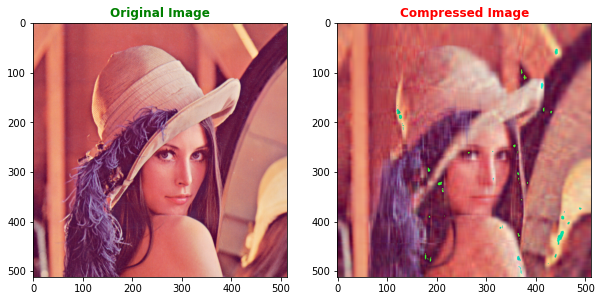

Original Size:  479778 
Compressed Size:  303195 

Compression Ratio:  1.5824073615989709 
PSNR:  5.212903852771445 
compression percentage:  36.805147380663556


In [22]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

print("Original Size: ", ori_size, "\nCompressed Size: ", compressed_size, "\n\nCompression Ratio: ", compression_ratio, "\nPSNR: ", psnr, "\ncompression percentage: ", compression_percentage)

In [23]:
# img = cv2.imread('out.png', 1)
# path = '/content/drive/MyDrive/Major/images/compressed'
# cv2.imwrite(os.path.join(path , out_name), img)

In [24]:
# with open('/content/drive/MyDrive/Minor II/PCA/output_pca.csv', 'a+', newline='') as file:
#   writer = csv.writer(file)
#   writer.writerow([file_name, ori_size, compressed_size, compression_ratio, psnr])

In [25]:
# # reading compressed output data file  
# pd.read_csv("/content/drive/MyDrive/Minor II/PCA/output_pca.csv")

In [26]:
im = Image.open(ci)
#im = Image.open('/content/drive/MyDrive/images/compressed/mandril_out.png')
#im.save('C:/Users/Ashish/Desktop/1.png')

In [34]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0],color

In [27]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [28]:
def genHenonMap(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize = dimension * dimension * 8 #Total Number of bitSequence produced
    bitSequence = []    #Each bitSequence contains 8 bits
    byteArray = []      #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = []   #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x

        x = xN
        y = yN

        if xN <= 0.4:
            bit = 0
        else:
            bit = 1

        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]

        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []

        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

In [29]:
#Encryption
def HenonEncryption(imageName,key):
    imageMatrix, dimension, color = getImageMatrix(imageName)
    transformationMatrix = genHenonMap(dimension, key)
    resultantMatrix = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:    
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
    if color:
      im = Image.new("RGB", (dimension, dimension))
    else: 
      im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = resultantMatrix[x][y]
    im.save(imageName.split('.')[0] + "_HenonEnc.png", "PNG")
    im.save("/content/drive/MyDrive/Major/images/encrypted/lenna_pca_HenonEnc.png", "PNG")

In [30]:
#Decryption
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimension, color = getImageMatrix(imageNameEnc)
    transformationMatrix = genHenonMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else: 
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageNameEnc.split('_')[0] + "_HenonDec.png", "PNG")
    im.save("/content/drive/MyDrive/Major/images/encrypted/lenna_pca_HenonDec.png", "PNG")

In [31]:
image = "lenna_pca_out"
ext = ".png"
key = (0.1,0.1)

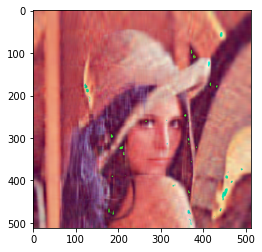

In [32]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

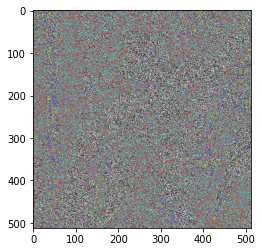

In [35]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

In [36]:
ei="/content/lenna_pca_out_HenonEnc.png"

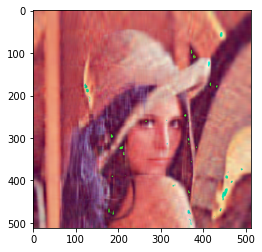

In [37]:
HenonDecryption(image + "_HenonEnc.png", key)

im = Image.open("/content/lenna_HenonDec.png", 'r')
imshow(np.asarray(im))

In [38]:
# Same as NPCR both are used for sensitivity analysis two encrypted image is required



# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
uloc1 = ei
uloc2 = oi
def uaci(loc1,loc2):
    image1 = Image.open(loc1)
    image2 = Image.open(loc2)
    pixel1=image1.load()
    pixel2=image2.load()
    width,height=image1.size
    value=0.0
    for y in range(0,height):
        for x in range(0,width):
            value=(abs(pixel1[x,y][0]-pixel2[x,y][0])/255)+value

    value=(value/(width*height))*100
    return value
print("UACI")
print(uaci(uloc1,uloc2))

#decrypted image and original image

UACI
34.92468441234932


In [39]:
  # It has a NPCR(Number of pixel changed rate).It compares the pixel values of the original image and the encrypted image.
  # The resultant value is returned in percentage.If the value is more than 99% then the analysis is positive.
    
   # It consist of three modules rateofchange(),sumofpixel(),npcrv().


 #   This method compares two image.If the pixel value is same then 0 is stored in the matrix else one is stored
# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
loc1 = ei
loc2 = oi
def rateofchange(height,width,pixel1,pixel2,matrix,i):

    for y in range(0,height):
        for x in range(0,width):
            #print(x,y)
            if pixel1[x,y][i] == pixel2[x,y][i]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    return matrix
"""
    sum of the values of 1 stored in matrix is calculated
"""
def sumofpixel(height,width,pixel1,pixel2,ematrix,i):
    matrix=rateofchange(height,width,pixel1,pixel2,ematrix,i)
    psum=0
    for y in range(0,height):
        for x in range(0,width):
            psum=matrix[x,y]+psum
    return psum

"""
Finally the above two module is called to calculate the values
"""
def npcrv(loc1,loc2):
    c1 = Image.open(loc1)
    c2 = Image.open(loc2)
    width, height = c1.size
    pixel1 = c1.load()
    pixel2 = c2.load()
    ematrix = np.empty([width, height])
    per=(((sumofpixel(height,width,pixel1,pixel2,ematrix,0)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,1)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,2)/(height*width))*100))/3
    return per
print("NPCR")
print(npcrv(loc1,loc2))

NPCR
99.83558654785156


In [42]:
#calculating size of encrypted and decrypted files
encrypted_img = Image.open(ei)
decrypted_img = Image.open(ci)
enimg = BytesIO()
encrypted_img.save(enimg, "png")
deimg = BytesIO()
decrypted_img.save(deimg, "png")
es = enimg.tell()
ds = deimg.tell()

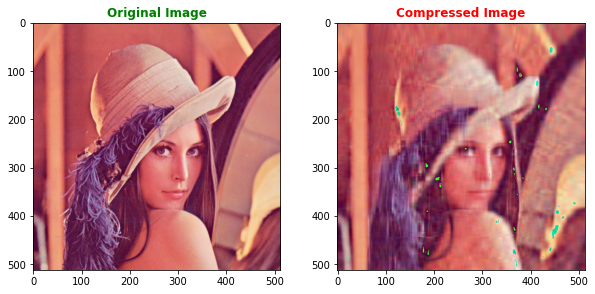

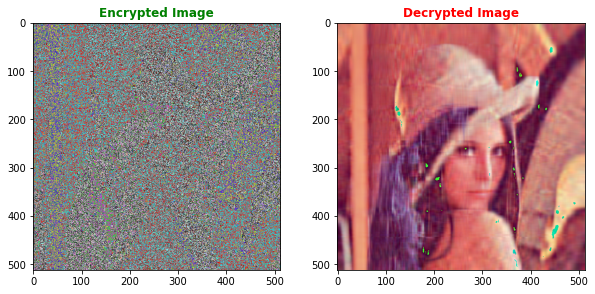

original image size
479778

compressed image size
303195

encrypted image size
785478

decrypted image size
303195

compression ratio
1.5824073615989709

UACI
34.92468441234932

NPCR
99.83558654785156


In [43]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(2, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(ei)
fig.add_subplot(2, 2, 3)
plt.imshow(img)
plt.title("Encrypted Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(2, 2, 4)
plt.imshow(img)
plt.title("Decrypted Image", color='red', fontweight="bold")
plt.show()

print("original image size")
print(ori_size) 
print("\ncompressed image size")
print(compressed_size)
print("\nencrypted image size")
print(es) 
print("\ndecrypted image size")
print(ds)
print("\ncompression ratio")
print(compression_ratio)
print("\nUACI")
print(uaci(uloc1,uloc2))
print("\nNPCR")
print(npcrv(loc1,loc2))